# Assignment3 : Transformer
이번 assignment는 transformer의 중요한 개념인 PE와, huggingface 사용법에 대한 이해를 높일 수 있는 2개의 간단한 문제들로 구성되어 있습니다. 첫 번째 task는 Positional Encoding에 관한 개념을 이해하고 코드로 구현한 후, 또다른 종류의 PE인 relative PE와 비교하는 것이며, 두 번째 task는 huggingface에서 BERT 모델을 불러와 간단한 Sentiment Classification task를 수행하는 코드를 구현하는 것입니다.

# #1. Analysing PE

첫 번째 과제는 "Attention is all you need"논문에서 소개하는 Transformer의 PE(Positional Encoding)를 이해한 후 코드로 구현하고, "Attentive Language Models Beyond a Fixed-Length Context"논문에서 제시하는 아키텍처인 Transformer-XL에서 사용하는 relative PE의 개념과 비교하는 것입니다.

위 논문에서 소개하는 가장 기본적인 PE는 Sinusoidal PE로, sin함수와 cos함수를 이용하여 PE를 구현하는 방식입니다.(sinusoidal function는 정현파 함수, 즉 우리가
아는 sin과 cos함수를 의미합니다.) 이러한 sinusodal function이 PE으로 사용될 수 있는 이유는 PE가 충족해야 하는 몇 가지 조건들을 충족하기 때문입니다.
이 조건들에는 '단어 임베딩 벡터와 같은 차원의 벡터를 반환한다.', '같은 위치에서는 항상 유일하게 같은 값이 나온다(deterministic).', '같은 거리만큼 떨어져 있으면
비슷한 값이 나온다.', '벡터의 값들이 정규화되어 있어야 한다.', '문장의 길이가 길더라도 사용 가능해야 한다.' 등이 있습니다. 이외에도 Sinusoidal PE는 여러 유리한 수학적인 특성들을 갖는데, 호기심이 생기신다면 구글에 'mathematical proof of sinusoidal positional encoding'로 검색하면 자세하게 다룹니다.

그러나 이후에 나온 "Pre-training of Deep Bidirectional Transformers for Language Understanding"논문에서 제시하는 아키텍처인 BERT모델은 이러한 방식으로 PE를 수행하는 대신, 위치 정보를 표현하기 위해서 학습 가능한 추가적인 임베딩 층(embedding layer)을 사용하였고(Positional Embedding) 이후에도 다양한 PE 방법들이 연구되었습니다. NLP에서도 Learned PE, Relative PE, Convolutional PE, Rotary PE 등이 연구되었습니다. 이러한 PE방식의 변화만으로 아키텍처의 형태가 바뀌거나 performence가 크게 변할 수 있습니다.

첫 번째 과제는 (TODO 1) Sinusoidal PE을 함수로 구현한 뒤에 그림으로 결과를 출력하고, (TODO 2) "Attentive Language Models Beyond a Fixed-Length Context"논문에서 제시하는 아키텍처인 Transformer-XL에서 사용하는 PE인 Relative Positional encoding를 공부한 후 Sinusoidal PE와 비교하는 것입니다.


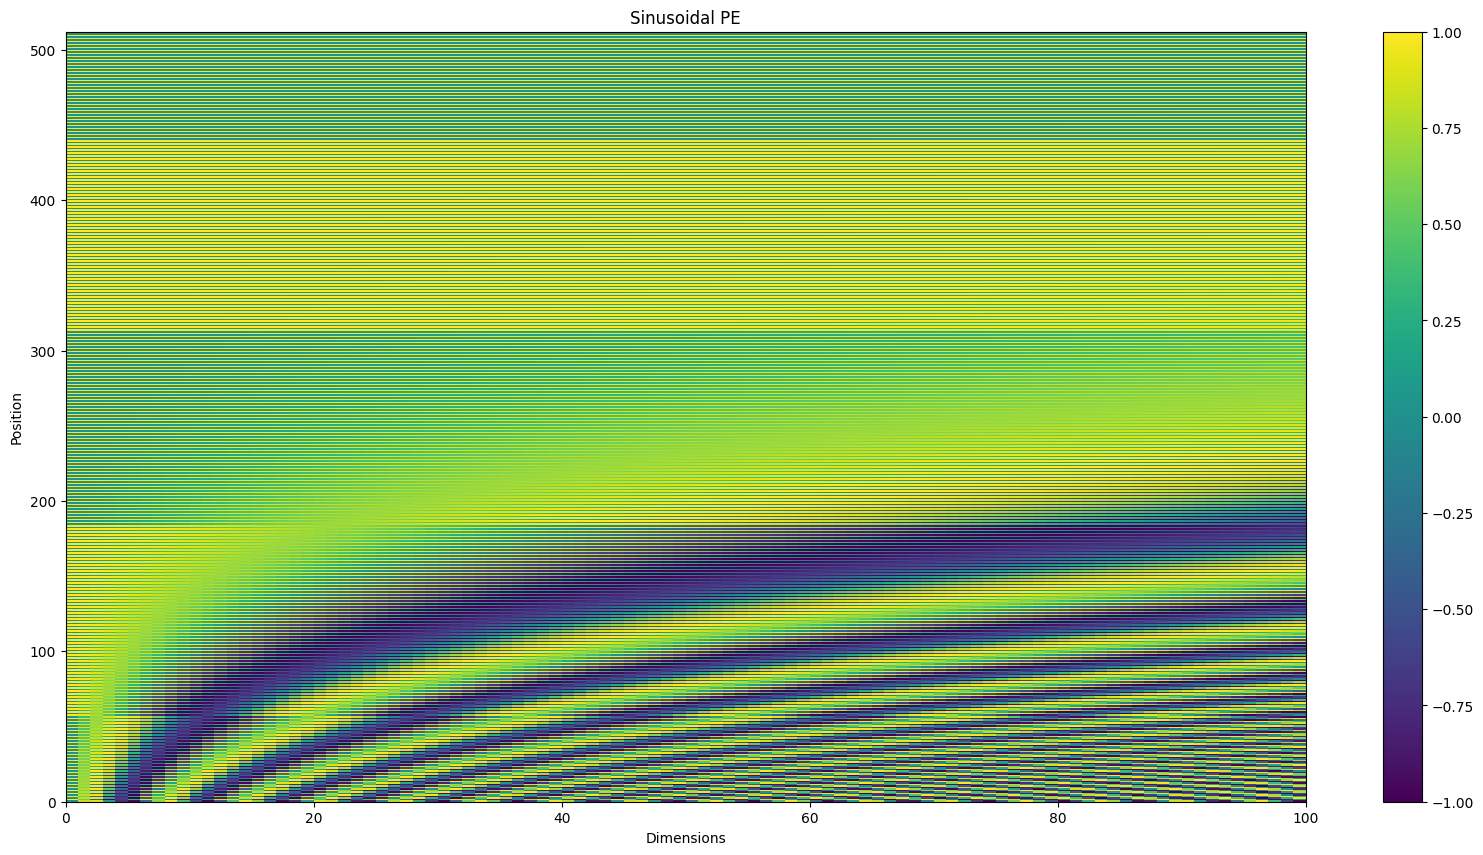

In [4]:
# TODO 1 : Sinusoidal PE 구현 및 출력
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# Sinusoidal PE 구현
class PositionalEncoding(nn.Module):
    def __init__(self, d_model=512, max_len=5000): # device도 parameter로 넣을 수 있음
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        x = torch.arange(0, d_model, 2)
        div = torch.exp(x.float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(pos * div)
        pe[:, 1::2] = torch.cos(pos * div)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x += self.pe[:x.size(1)]
        return x


# matplotlib으로 결과 출력

pe = PositionalEncoding(d_model=512, max_len=100)
pos_encodings = pe.pe.squeeze(0)

plt.figure(figsize=(20, 10))
plt.pcolormesh(pos_encodings.T, cmap='viridis')
plt.colorbar()
plt.xlabel('Dimensions')
plt.ylabel('Position')
plt.title('Sinusoidal PE')
plt.show()

TODO 2 : Sinusoidal PE와 Transformer-XL의 Relative Positional encoding 비교
->

Sinusoidal Positional Encoding(PE)는 각 위치에 대해 사인(sin)과 코사인(cos) 함수를 사용하여 위치 정보를 인코딩합니다. 이 인코딩 방법은 모델이 임의의 길이의 시퀀스를 처리할 수 있습니다. 모델은 절대적인 위치 정보를 인코딩하여 시퀀스 내에서 상대적인 위치 관계를 효과적으로 학습할 수 있습니다. Relative Positional Encoding과 달리 학습되지 않는 고정된 값입니다.

Transformer-XL은 Transformer의 기본 구조를 개선하여 더 긴 문맥을 효율적으로 처리할 수 있게 설계되었습니다. 여기서 나온 Relative Positional Encoding은 토큰 간의 상대적인 위치를 인코딩하여, 모델이 시퀀스 내에서 각 토큰 간의 거리를 고려할 수 있습니다. Sinusodial Positional Encoding과 달리 학습 가능한 파라미터를 포함합니다.

# #2. Using fuggingface to fine-tuning
두 번째 과제는 아래에 있는 코드에서 TODO로 적혀있는 부분을 채워주시면 됩니다. TODO는 총 5개(+1)가 있으며 4번은 코드 및 서술, 5번은 서술을 요구합니다.
아래의 코드는 폴더에 같이 주어진 sentiment_data.csv dataset을 통해 Sentiment Classification task를 수행하도록 BERT model을 fine-tuning하는 코드를 구현한 것입니다.

In [ ]:
# 필요한 라이브러리를 import합니다.
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from torch.optim import AdamW
from tqdm import tqdm

In [ ]:
# 코랩 환경에서 어마운트하는 코드입니다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터를 불러오는 코드입니다. csv파일을 불러올 수 있도록 file_dir를 채워주세요.
file_dir = 'sentiment_data.csv'
emotions_df = pd.read_csv(file_dir)
emotions_df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [ ]:
print("Dataset size: ", len(emotions_df))
print("Dataset distinct labels: ", set(emotions_df['Emotion']))

Dataset size:  5937
Dataset distinct labels:  {'fear', 'anger', 'joy'}


# # Data preparation
앞으로 3개의 셀에서는 모델을 데이터를 학습할 수 있도록 데이터를 변환하는 작업을 수행합니다.

In [ ]:
# input과 label을 변환하는 작업입니다. label을 classification을 위한 원핫인코딩을 할 때 아래와 같이 직접 정의하지 않고 sklearn.preprocessing 라이브러리를
# 이용하는 것이 일반적입니다.
label_mapping = {'joy': 0, 'anger': 1, 'fear': 2}

comments = emotions_df['Comment'].tolist()
emotions = emotions_df['Emotion'].tolist()
emotions = [label_mapping[emotion] for emotion in emotions]

In [ ]:
##########
# TODO 1 #
##########
# input data를 tokenizer의 encode_plus함수를 통해 인코딩합니다. 주석에 해당하는 적절한 parameters를 넣어주세요.
# 아래의 링크에서 검색창에 encode_plus를 입력하면 이 함수를 어떻게 사용해야 하는지 알 수 있습니다.
# https://huggingface.co/docs/transformers/v4.39.1/en/main_classes/tokenizer#transformers.BatchEncoding

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

input_ids = []
attention_masks = []

for comment in comments:
    # TODO 1:
    encoded_dict = tokenizer.encode_plus(
                        comment, # tokenize의 대상
                        add_special_tokens = True, # [CLS], [SEP] token 추가
                        max_length = 128, # 하나의 data의 최대 길이는 128
                        padding = 'max_length', # 가장 긴 data를 기준으로 패딩 수행
                        return_attention_mask = True, # attention masks를 return함
                        return_tensors = 'pt', # PyTorch tensor로 return함
                   )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# encoding된 data를 dataloader에 넣을 수 있도록 input, attention mask, label을 tensor로 변환합니다.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(emotions)

# # Define model
이제 data loader 및 몇가지 parameter들을 정의한 후, 모델을 정의합니다.

In [ ]:
# hyperparameter들을 정의합니다.
BATCH_SIZE = 32
LR = 1e-5
EPSILON = 2e-8
EPOCHS = 4

In [ ]:
# 데이터를 train, validation, test로 분리합니다.
train_inputs, test_inputs, train_masks, test_masks, train_labels, test_labels = train_test_split(input_ids, attention_masks, labels, test_size=0.2, random_state=42)
train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(train_inputs, train_masks, train_labels, test_size=0.2, random_state=42)

# train, validation, test datase을 정의 후 DataLoader를 정의합니다.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_dataloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)


In [ ]:
##########
# TODO 2 #
##########
# model과 optimizer를 정의합니다. optimizer를 위에서 정의한 parameter들을 이용하여 적절히 정의해주세요.
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_mapping))

# TODO 5: drop out 추가
model.config.hidden_dropout_prob = 0.3
model.config.attention_probs_dropout_prob = 0.3

# TODO 2:
optimizer = AdamW(model.parameters(), lr = LR, eps = EPSILON)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# send model to gpu
model = model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# # Train & Test
위에서 정의한 함수와 모델로 모델을 학습하고 test합니다.

In [ ]:
##############
# TODO 3 & 4 #
##############
# task에 알맞는 loss function과 loss를 구하는 코드를 구현해주세요. 이후 아래의 torch.max 함수에 들어갈 값을 적고 이유를 주석으로 간단히 적어주세요.
def test(dataloader, model):
    '''
    모델의 결과 측정을 위한 함수입니다.
    TODO
    '''
    model.eval()
    total_test_loss = 0
    correct = 0
    total = 0

    # val_dataloader는 배치 크기의 val_inputs, val_masks, val_labels를 반환하고, 이로 모델을 test합니다.
    for batch in tqdm(val_dataloader, desc='Validation/Testing'):
        # data를 GPU로 연결합니다.
        inputs_tuple = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': inputs_tuple[0],
                  'attention_mask': inputs_tuple[1],
                  'labels': inputs_tuple[2]
                 }
        # test시 매개변수들의 기울기를 필요로 하지 않기 때문에 with no_grad 는 cost와 time를 줄여줍니다.
        with torch.no_grad():
            outputs = model(**inputs)

        # logit과 label를 추출합니다.
        logits = outputs.logits
        labels = inputs['labels']

        # TODO 3:
        loss_fn = nn.CrossEntropyLoss()
        test_loss = loss_fn(logits.view(-1, len(label_mapping)), labels.view(-1))
        total_test_loss += test_loss.mean().item()

        # TODO 4:
        _, predicted = torch.max(logits, dim=1) # 예측된 class의 인덱스를 반환하기 위해, 각 class에 해당하는 값 중에서 최댓값을 찾아야 하기 때문이다.

        # get total labels and correct ones
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    # 한 epoch의 eval loss를 출력합니다.
    accuracy = correct / total
    avg_test_loss = total_test_loss / len(dataloader)
    print(f"Average Validation/Test Loss: {avg_test_loss:.4f}")
    print(f"Validation/Test Accuracy: {accuracy:.4f}")

In [ ]:
def train(epochs, train_dataloader, val_dataloader, model, optimizer):
    '''
    모델의 학습을 위한 함수입니다.
    '''
    for epoch in range(epochs):
        # 딥러닝 모델은 학습시 .train()을 붙여 학습 모드로 설정.
        # 이는 모델 내의 모든 파라미터가 업데이트 될 수 있도록 설정되며, 일부 레이어들이 학습 과정에 특화된 동작을 합니다.(e.g. dropout, Batch Normalization)
        model.train()
        total_train_loss = 0

        # train_dataloader는 배치 크기의 train_inputs, train_masks, train_labels를 반환하고, 이로 모델을 학습합니다.
        for batch in tqdm(train_dataloader, desc='Epoch {}'.format(epoch+1)):
            # data를 GPU로 연결합니다.
            input_tuple = tuple(t.to(device) for t in batch)
            # 모델이 학습할 수 있도록 배치 데이터를 구분하여 딕셔너리 형태로 저장합니다.
            inputs = {'input_ids': input_tuple[0],
                      'attention_mask': input_tuple[1],
                      'labels': input_tuple[2]
                     }
            # optimizer에 저장된 매개변수들의 기울기를 초기화합니다.
            optimizer.zero_grad()
            # output을 도출합니다.
            outputs = model(**inputs)
            # loss를 저장합니다.
            loss = outputs.loss
            total_train_loss += loss
            # loss function에 대한 모델 매개변수들의 기울기를 계산합니다.
            loss.backward()
            # model 매개변수들을 update합니다.
            optimizer.step()
        # 한 epoch의 평균 train loss를 출력합니다.
        avg_train_loss = total_train_loss / len(train_dataloader)
        print(f"Average Training Loss: {avg_train_loss:.4f}")

        test(val_dataloader, model)


이후 4 에포크 동안 모델의 accuracy를 보면 모델이 잘 학습됨을 볼 수 있고, hyperparmeter를 튜닝하거나 모델을 바꿈으로써 더욱 높은 performance를 만들 수 있습니다.

In [ ]:
train(EPOCHS, train_dataloader, val_dataloader, model, optimizer)

Epoch 1: 100%|██████████| 119/119 [01:17<00:00,  1.53it/s]


Average Training Loss: 0.8178


Validation/Testing: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Average Validation/Test Loss: 0.4446
Validation/Test Accuracy: 0.8632


Epoch 2: 100%|██████████| 119/119 [01:17<00:00,  1.53it/s]


Average Training Loss: 0.2411


Validation/Testing: 100%|██████████| 30/30 [00:14<00:00,  2.14it/s]


Average Validation/Test Loss: 0.2035
Validation/Test Accuracy: 0.9295


Epoch 3: 100%|██████████| 119/119 [01:18<00:00,  1.53it/s]


Average Training Loss: 0.1039


Validation/Testing: 100%|██████████| 30/30 [00:13<00:00,  2.31it/s]


Average Validation/Test Loss: 0.1511
Validation/Test Accuracy: 0.9463


Epoch 4: 100%|██████████| 119/119 [01:18<00:00,  1.52it/s]


Average Training Loss: 0.0512


Validation/Testing: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Average Validation/Test Loss: 0.1568
Validation/Test Accuracy: 0.9421


test결과를 보면 오버피팅 되지 않았음을 알 수 있습니다.

In [ ]:
test(test_dataloader, model)

Validation/Testing: 100%|██████████| 30/30 [00:13<00:00,  2.28it/s]

Average Validation/Test Loss: 0.1238
Validation/Test Accuracy: 0.9421


In [ ]:
##########
# TODO 5 #
##########

# TODO 5: 오버피팅을 피하는 방법을 세 가지 설명해주세요.
# 1) Data Augmentation: train dataset을 변형해 모델이 더 다양한 패턴을 학습하도록 만든다. 문장의 단어를 동의어로 바꾸는 방법 등을 사용할 수 있다.
# 2) Drop out: train 과정 중 무작위로 뉴런의 값을 0으로 설정하여, 모델의 일반화 성능을 높인다.
# 3) Ensemble: 여러 모델의 결과를 조합하여 새로운 모델을 만드는 방법이다.

# additional: 위 regularization 기법 중 하나를 위의 코드에 추가해주세요.